In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


import pandas as pd

In [4]:
podatki = pd.read_csv("podatki.csv", delimiter=";", low_memory=False)
podatki["DATUM_PRVE_REGISTRACIJE"] = pd.to_datetime(podatki["DATUM_PRVE_REGISTRACIJE"], infer_datetime_format=True)
podatki["DATUM_PRVE_REGISTRACIJE_SLO"] = pd.to_datetime(podatki["DATUM_PRVE_REGISTRACIJE_SLO"], infer_datetime_format=True)
podatki["DATUM_PREGLEDA"] = pd.to_datetime(podatki["DATUM_PREGLEDA"], infer_datetime_format=True)

In [13]:
podatki.dtypes

ZNAMKA                                 object
TOVARNISKA_OZNAKA                      object
KOMERCIALNA_OZNAKA                     object
KOMERCIALNI_TIP                        object
VIN                                    object
VIN_TRAKTORJA                          object
KATEGORIJA_OZNAKA                      object
KATEGORIJA_OPIS                        object
NADGRADNJA_OZNAKA                      object
NADGRADNJA_OPIS                        object
DODATNA_NADGRADNJA_OPIS                object
VRSTA_GORIVA_OZNAKA                    object
VRSTA_GORIVA_OPIS                      object
NAMEN_VOZILA                           object
DATUM_PRVE_REGISTRACIJE        datetime64[ns]
DATUM_PRVE_REGISTRACIJE_SLO    datetime64[ns]
PREVOZENI_KILOMETRI                   float64
LASTNIK_VOZILA                         object
UPORABNIK_VOZILA                       object
DATUM_PREGLEDA                 datetime64[ns]
TEHNICNI_ZAPISNIK_RAZLOG               object
TEHNICNI_PREGLED_STATUS           

### Poprava znamk

In [5]:
#df['column name'] = df['column name'].replace(['old value'],'new value')
podatki["ZNAMKA"] = podatki["ZNAMKA"].replace(['MERCEDES BENZ'], 'MERCEDES-BENZ')
podatki["ZNAMKA"] = podatki["ZNAMKA"].replace(['VOLKSWAGEN, VW'], 'VOLKSWAGEN')

## Števila osebnih avtomobilov po znamkah

In [39]:
podatkiOsebnaVozila = podatki[podatki["KATEGORIJA_OPIS"] == "osebni avtomobil"]
countZnamkeOsebnihVozil = podatkiOsebnaVozila.groupby("ZNAMKA")["ZNAMKA"].count()

In [44]:
dictCount = countZnamkeOsebnihVozil.to_dict()
dictCount = dict(sorted(dictCount.items(),reverse=True, key=lambda item: item[1]))

In [45]:
for key in list(dictCount.keys()):
    if(dictCount[key] < 50):
        del dictCount[key]

keysCount = dictCount.keys()
valuesCount = list(dictCount.values())

In [46]:
k = list()

for key in keysCount:
    k.append(str(key) + " (" + str(dictCount[key]) + ")" )
    
k

['RENAULT (30542)',
 'VOLKSWAGEN (25250)',
 'OPEL (13021)',
 'CITROEN (12148)',
 'PEUGEOT (11483)',
 'FORD (7902)',
 'AUDI (7249)',
 'FIAT (6911)',
 'TOYOTA (6344)',
 'HYUNDAI (5349)',
 'BMW (5055)',
 'ŠKODA (4957)',
 'MERCEDES-BENZ (4841)',
 'SEAT (4259)',
 'HONDA (3189)',
 'KIA (2750)',
 'MAZDA (2587)',
 'NISSAN (2543)',
 'SUZUKI (2304)',
 'CHEVROLET (1940)',
 'VOLVO (1713)',
 'MITSUBISHI (1318)',
 'ALFA ROMEO (872)',
 'DAEWOO (686)',
 'SUBARU (518)',
 'LAND ROVER (446)',
 'ZASTAVA (428)',
 'DACIA (292)',
 'JEEP (280)',
 'LANCIA (270)',
 'SAAB (197)',
 'CHRYSLER (192)',
 'MINI (192)',
 'PORSCHE (152)',
 'FIAT-ADRIA (145)',
 'SMART (134)',
 'CITROËN (129)',
 'UNIS (127)',
 'ROVER (116)',
 'DAIHATSU (113)',
 'JAGUAR (111)',
 'LADA (106)',
 'SSANGYONG (101)',
 'LEXUS (68)',
 'DODGE (66)',
 'IMV (59)',
 'CIMOS (54)']

<function matplotlib.pyplot.show(close=None, block=None)>

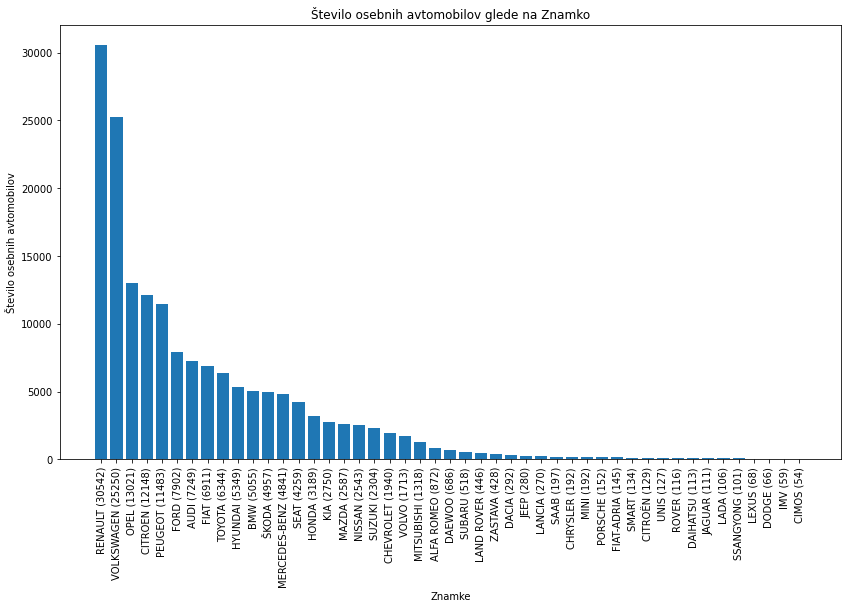

In [47]:
fig = plt.figure(figsize=(14,8))
plt.bar(k, valuesCount)
plt.xticks(rotation = 90)
plt.xlabel("Znamke")
plt.ylabel("Število osebnih avtomobilov")
plt.title("Število osebnih avtomobilov glede na Znamko")
plt.show

## Odstotek brezhibno opravljenih Tehničnih pregledov osebnih avtomobilov po znamkah

In [49]:
podatkiOsebnaVozila = podatki[podatki["KATEGORIJA_OPIS"] == "osebni avtomobil"]
p1 = podatkiOsebnaVozila[podatkiOsebnaVozila["TEHNICNI_PREGLED_STATUS"] == "brezhiben"].groupby("ZNAMKA")["ZNAMKA"].count()

In [50]:
p2 = podatkiOsebnaVozila.groupby("ZNAMKA")["ZNAMKA"].count()
p2 = p2.to_dict()

for key in list(p2.keys()):
    if(p2[key] < 50):
        del p2[key]

In [51]:
brezhib = dict()
for key in p2:
    brezhib[key] = p1[key] / p2[key] *100

### Deset najbolj brezhibnih znamk

In [52]:
b = pd.DataFrame.from_dict(brezhib, orient="index")
b.columns = ["Odstotek brezhibnih"]
b.nlargest(10, "Odstotek brezhibnih")

,Odstotek brezhibnih
CIMOS,92.592593
ZASTAVA,89.485981
PORSCHE,84.868421
FIAT-ADRIA,82.068966
JAGUAR,81.981982
IMV,81.355932
LEXUS,80.882353
DAIHATSU,80.530973
LAND ROVER,80.493274
MERCEDES-BENZ,78.826689


## Odstotek brezhibno oprevljenih Tehničnih pregledov po letu prve registracije

In [34]:
datumReg = podatki["DATUM_PRVE_REGISTRACIJE"]
letoReg = list()

for d in datumReg:
    if isinstance(d, str):
        letoReg.append(d[-4:])

In [51]:
letoReg = [int(x) for x in letoReg]
letoReg = pd.Series(letoReg)

In [52]:
podatki1 = podatki.copy()
podatki1.insert(14,"LETO_PRVE_REGISTRACIJE", letoReg)
podatki1["LETO_PRVE_REGISTRACIJE"]

0         2004.0
1         2006.0
2         2000.0
3         2004.0
4         1996.0
           ...  
229678       NaN
229679       NaN
229680       NaN
229681       NaN
229682       NaN
Name: LETO_PRVE_REGISTRACIJE, Length: 229683, dtype: float64

In [54]:
r1 = podatki1[podatki1["TEHNICNI_PREGLED_STATUS"] == "brezhiben"].groupby("LETO_PRVE_REGISTRACIJE")["LETO_PRVE_REGISTRACIJE"].count()

In [67]:
r2 = podatki1.groupby("LETO_PRVE_REGISTRACIJE")["LETO_PRVE_REGISTRACIJE"].count()
r2 = r2.to_dict()

for key in list(r2.keys()):
    if(r2[key] < 50):
        del r2[key]
        

In [69]:
brezhibL = dict()
for key in r2:
    brezhibL[key] = r1[key] / r2[key] * 100

In [72]:
bL = pd.DataFrame.from_dict(brezhibL, orient="index")
bL.columns = ["Odstotek brezhibnih"]
bL.nlargest(5, "Odstotek brezhibnih")

,Odstotek brezhibnih
2012.0,83.544304
2021.0,82.666667
1983.0,81.491003
2011.0,79.452055
1980.0,78.947368


### Odstotek opravljenih tehničnih pregledov po desetletjih

In [6]:
podatki1 = podatki.copy()
datumiReg = podatki1["DATUM_PRVE_REGISTRACIJE"].tolist()

desetletje = []

for d in datumiReg:
    y = d.year
    y = y - y%10
    desetletje.append(y)


#desetletje

In [7]:
podatki1["DESETLETJE_REG"] = desetletje
podatki1OsebnaVozila = podatki1[podatki1["KATEGORIJA_OPIS"] == "osebni avtomobil"]

In [8]:
count1 = podatki1OsebnaVozila[podatki1OsebnaVozila["TEHNICNI_PREGLED_STATUS"] == "brezhiben"].groupby("DESETLETJE_REG")["ZNAMKA"].count()
count2 = podatki1OsebnaVozila[podatki1OsebnaVozila["TEHNICNI_PREGLED_STATUS"] != "brezhiben"].groupby("DESETLETJE_REG")["ZNAMKA"].count()

In [9]:
count1l = count1.tolist()
count2l = count2.tolist()


# spustimo desetletja ki imajo manj kot 100 pregledov
count1l = count1l[5:-1]
count2l = count2l[1:-1]

count1p = []
count2p = []

for x,y in zip(count1l,count2l):
    p = x/(x+y)
    count1p.append(p)
    count2p.append(1-p)

    
count2p


    

[0.11710677382319168,
 0.1597069597069597,
 0.2828331332533013,
 0.2647725350921698,
 0.20209059233449478]

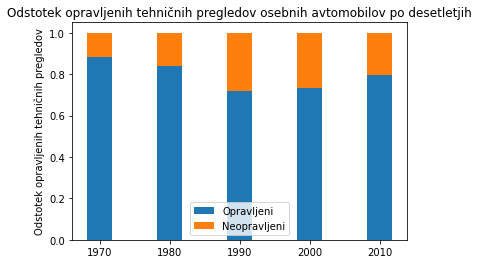

In [10]:

labels = ['1970','1980','1990','2000','2010']
width = 0.35

fig, ax = plt.subplots()


ax.bar(labels, count1p, width, yerr=None, label='Opravljeni')
ax.bar(labels, count2p, width, yerr=None, bottom=count1p,
       label='Neopravljeni')

ax.set_ylabel('Odstotek opravljenih tehničnih pregledov')
ax.set_title('Odstotek opravljenih tehničnih pregledov osebnih avtomobilov po desetletjih')
ax.legend()

plt.show()
